In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score,accuracy_score,precision_score,recall_score,classification_report#분류평가

1.데이터 수집

In [ ]:
import seaborn as sns
df=sns.load_dataset('titanic')
df1=df.iloc[:,:8]

2.데이터 전처리
1. 결측치 처리
2. 이상치 처리

In [ ]:
#연속
df1.age.fillna(df1.age.mean(),inplace=True)
df1.age=df1.age.astype('int32')

In [ ]:
#범주
df1.dropna(inplace=True)

In [ ]:
df1.reset_index(drop=True,inplace=True)

In [ ]:
X=df1.drop(['survived'],axis=1)
y=df1['survived'].values

3. 범주형처리

In [ ]:
def n_c_df_분류(df):
  n_l=[]
  c_l=[]
  for column in df.columns.to_list():
    if df[column].nunique()<11:
      c_l.append(column)
      continue
    n_l.append(column)
  n_df=df.drop(c_l,axis=1)
  n_df=n_df.astype(dict.fromkeys(n_df.columns,'float64'))
  c_df=df.drop(n_l,axis=1)
  c_df=c_df.astype(dict.fromkeys(c_df.columns,'category'))
  return (n_df,c_df)

In [ ]:
n_df,c_df=n_c_df_분류(X)

In [ ]:
c_df

,pclass,sex,sibsp,parch,embarked
0,3,male,1,0,S
1,1,female,1,0,C
2,3,female,0,0,S
3,1,female,1,0,S
4,3,male,0,0,S
...,...,...,...,...,...
884,2,male,0,0,S
885,1,female,0,0,S
886,3,female,1,2,S
887,1,male,0,0,C


In [ ]:
def 범주처리기(c_df):
  c_o_h_e=OneHotEncoder()
  c_o_h_e.fit(c_df)
  tr_data=c_o_h_e.transform(c_df)
  out_data=tr_data.toarray()
  c_df=pd.DataFrame(out_data,columns=c_o_h_e.get_feature_names_out())
  return c_df

In [ ]:
s_c_df=범주처리기(c_df)
s_c_df

,pclass_1,pclass_2,pclass_3,sex_female,sex_male,sibsp_0,sibsp_1,sibsp_2,sibsp_3,sibsp_4,...,parch_0,parch_1,parch_2,parch_3,parch_4,parch_5,parch_6,embarked_C,embarked_Q,embarked_S
0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
885,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
886,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
887,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


4. 범위처리

In [ ]:
n_df

,age,fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500
...,...,...
884,27.0,13.0000
885,19.0,30.0000
886,29.0,23.4500
887,26.0,30.0000


In [ ]:
def 범위처리기(n_df):
  from sklearn.preprocessing import StandardScaler
  s_e=StandardScaler()
  name=n_df.columns.to_list()
  s_e.fit(n_df)
  s_data=s_e.transform(n_df)
  n_df=pd.DataFrame(s_data,columns=name)
  return n_df

In [ ]:
s_n_df=범위처리기(n_df)
s_n_df

,age,fare
0,-0.578023,-0.500240
1,0.655371,0.788947
2,-0.269675,-0.486650
3,0.424109,0.422861
4,0.424109,-0.484133
...,...,...
884,-0.192588,-0.384475
885,-0.809285,-0.042213
886,-0.038413,-0.174084
887,-0.269675,-0.042213


5. 전처리된 데이터 데이터 프레임 화

In [ ]:
def 병합(n_df,c_df):
    out_df=pd.concat([n_df,c_df],axis=1)
    return out_df

In [ ]:
out_df=병합(s_n_df,s_c_df)
out_df

,age,fare,pclass_1,pclass_2,pclass_3,sex_female,sex_male,sibsp_0,sibsp_1,sibsp_2,...,parch_0,parch_1,parch_2,parch_3,parch_4,parch_5,parch_6,embarked_C,embarked_Q,embarked_S
0,-0.578023,-0.500240,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.655371,0.788947,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,-0.269675,-0.486650,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.424109,0.422861,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.424109,-0.484133,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884,-0.192588,-0.384475,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
885,-0.809285,-0.042213,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
886,-0.038413,-0.174084,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
887,-0.269675,-0.042213,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
s_X=out_df
s_y=y

In [ ]:
tr_x,tt_x,tr_y,tt_y=train_test_split(s_X,s_y,random_state=1)
tr_x.shape,tt_x.shape,tr_y.shape,tt_y.shape

((666, 24), (223, 24), (666,), (223,))

3.학습

In [ ]:
m=LogisticRegression()
m.fit(tr_x,tr_y)
m.score(tr_x,tr_y),m.score(tt_x,tt_y)

(0.8078078078078078, 0.8565022421524664)

4.테스트 및 검증

In [ ]:
ty=tt_y
py=m.predict(tt_x)
print(classification_report(ty,py))

              precision    recall  f1-score   support

           0       0.88      0.89      0.88       138
           1       0.82      0.80      0.81        85

    accuracy                           0.86       223
   macro avg       0.85      0.85      0.85       223
weighted avg       0.86      0.86      0.86       223



#전처리기 통합 클래스화

In [ ]:
class data_preprocessor:
  import pandas as pd
  from sklearn.preprocessing import OneHotEncoder,StandardScaler,MinMaxScaler
  def __init__(self,df,y_name,category_judgment_condition=11,c_encoder='OneHotEncoder()',n_encoder='StandardScaler()'):
    all_df=df.copy()
    self.y_name=y_name
    X=all_df.drop([self.y_name],axis=1)
    self.y=all_df[self.y_name]
    self.origin_df=X
    self.h_na_df=None
    self.h_out_df=None
    self.n_df=None
    self.c_df=None
    self.c_l=[]
    self.n_l=[]
    self.category_judgment_condition=category_judgment_condition
    for column in df:
      if df[column].nunique()<category_judgment_condition:
        self.c_l.append(column)
        continue
      self.n_l.append(column)
    self.c_encoder=eval("self."+c_encoder)
    self.n_encoder=eval("self."+n_encoder)
    self.out_df=None
    self.out_X=None
    self.out_y=None

  def missing_value_processing(self):
    ck=True
    df=self.origin_df.copy()
    d_l=[]
    for i in df.columns.to_list():
      if (df[i].isnull().sum()/len(df))>=0.5:
        d_l.append(i)
        continue
      if df[i].isnull().sum()>0:
        if i in self.n_l and df[i].isnull().sum()/len(df)<0.2:
          df[i].fillna(df[i].mean(),inplace=True)
      if df[i].isnull().sum()/len(df)>0.2:
        ck=False
    if d_l:
      df.drop(d_l,axis=1,inplace=True)
    if ck:
      df.dropna(inplace=True)
    else:
      print("특이 사항으로 추가 결측치 정리가 필요합니다.")
      return df
    self.c_l=[]
    self.n_l=[]
    for column in df:
      if df[column].nunique()<self.category_judgment_condition:
        self.c_l.append(column)
        continue
      self.n_l.append(column)
    ck_df=pd.merge(df,self.y,right_index=True,left_index=True)
    ck_df.reset_index(drop=True,inplace=True)
    self.y=ck_df[self.y_name]
    df=ck_df.drop([self.y_name],axis=1)
    X=df.copy()
    X=X.astype(dict.fromkeys(self.n_l,'float64'))
    X=X.astype(dict.fromkeys(self.c_l,'category'))
    self.h_na_df=X
    return X

  def outlier_value_processing(self,df):
    print("이상치 처리는 연속성 데이터만 진행 됩니다.")
    X=df.copy()
    Q1 = X.quantile(q=0.25,numeric_only=True)
    Q3 = X.quantile(q=0.75,numeric_only=True)
    IQR=Q3-Q1
    for i in Q1.index.to_list():
      X = X[(X[i] <= Q3[i]+1.5*IQR[i]) & (X[i] >= Q1[i]-1.5*IQR[i])]
    X=pd.merge(X,self.y,right_index=True,left_index=True)
    X.reset_index(drop=True,inplace=True)
    self.y=X[self.y_name]
    X=X.drop([self.y_name],axis=1)
    self.h_out_df=X
    return X

  def n_c_df_classification(self,df):
    self.c_l=[]
    self.n_l=[]
    for column in df:
      if df[column].nunique()<self.category_judgment_condition:
        self.c_l.append(column)
        continue
      self.n_l.append(column)
    n_df=df.drop(self.c_l,axis=1)
    self.n_df=n_df.astype(dict.fromkeys(n_df.columns,'float64'))
    c_df=df.drop(self.n_l,axis=1)
    self.c_df=c_df.astype(dict.fromkeys(c_df.columns,'category'))
    #return self.merge_df(self.n_df,self.c_df)
    return (self.n_df,self.c_df)

  def categorical_handler(self,c_df):
    self.c_encoder.fit(c_df)
    tr_data=self.c_encoder.transform(c_df)
    out_data=tr_data.toarray()
    self.c_df=self.pd.DataFrame(out_data,columns=self.c_encoder.get_feature_names_out())
    return self.c_df

  def continuous_handler(self,n_df):
    name=n_df.columns.to_list()
    self.n_encoder.fit(n_df)
    s_data=self.n_encoder.transform(n_df)
    self.n_df=self.pd.DataFrame(s_data,columns=name)
    return self.n_df

  def merge_df(self,n_df,c_df):
    self.out_df=self.pd.concat([self.categorical_handler(c_df),self.continuous_handler(n_df)],axis=1)
    return self.out_df

  def add_categorical_handler(self,df):
    tr_data=self.c_encoder.transform(df)
    out_data=tr_data.toarray()
    out_df=self.pd.DataFrame(out_data,columns=self.c_encoder.get_feature_names_out())
    return out_df

  def add_continuous_handler(self,df):
    name=df.columns.to_list()
    tr_data=self.n_encoder.transform(df)
    out_df=self.pd.DataFrame(tr_data,columns=name)
    return out_df

  def run(self,이상치처리="X"):
    df=self.missing_value_processing()
    if df.isnull().sum().sum()>0:
      return df
    if 이상치처리=='O':
      df=self.outlier_value_processing(df)
    else:
      print("이상치 처리 없이 진행됩니다.")
    n_df,c_df=self.n_c_df_classification(df)
    s_X=self.merge_df(n_df,c_df)
    self.out_X=s_X
    self.out_y=self.y
    return self.out_X,self.out_y

In [ ]:
import seaborn as sns
df=sns.load_dataset('titanic')
df1=df.iloc[:,:8]
전처리기=data_preprocessor(df1,'survived')
out_x1,out_y1=전처리기.run()

이상치 처리 없이 진행됩니다.


In [ ]:
tr_x1,tt_x1,tr_y1,tt_y1=train_test_split(out_x1,out_y1,random_state=1)
tr_x1.shape,tt_x1.shape,tr_y1.shape,tt_y1.shape

((666, 24), (223, 24), (666,), (223,))

In [ ]:
import seaborn as sns
df=sns.load_dataset('titanic')
df1=df.iloc[:,:8]
전처리기=data_preprocessor(df1,'survived')
out_x2,out_y2=전처리기.run('O')

이상치 처리는 연속성 데이터만 진행 됩니다.


In [ ]:
tr_x2,tt_x2,tr_y2,tt_y2=train_test_split(out_x2,out_y2,random_state=1)
tr_x2.shape,tt_x2.shape,tr_y2.shape,tt_y2.shape

((540, 23), (181, 23), (540,), (181,))

In [ ]:
out_x1.columns

Index(['pclass_1', 'pclass_2', 'pclass_3', 'sex_female', 'sex_male', 'sibsp_0',
       'sibsp_1', 'sibsp_2', 'sibsp_3', 'sibsp_4', 'sibsp_5', 'sibsp_8',
       'parch_0', 'parch_1', 'parch_2', 'parch_3', 'parch_4', 'parch_5',
       'parch_6', 'embarked_C', 'embarked_Q', 'embarked_S', 'age', 'fare'],
      dtype='object')

In [ ]:
out_x2.columns

Index(['pclass_1', 'pclass_2', 'pclass_3', 'sex_female', 'sex_male', 'sibsp_0',
       'sibsp_1', 'sibsp_2', 'sibsp_3', 'sibsp_4', 'sibsp_5', 'parch_0',
       'parch_1', 'parch_2', 'parch_3', 'parch_4', 'parch_5', 'parch_6',
       'embarked_C', 'embarked_Q', 'embarked_S', 'age', 'fare'],
      dtype='object')

In [ ]:
df[df.sibsp==8]

In [ ]:
df.fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: fare, dtype: float64

In [ ]:
전처리기.n_l

['age', 'fare']

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'fare'}>]], dtype=object)

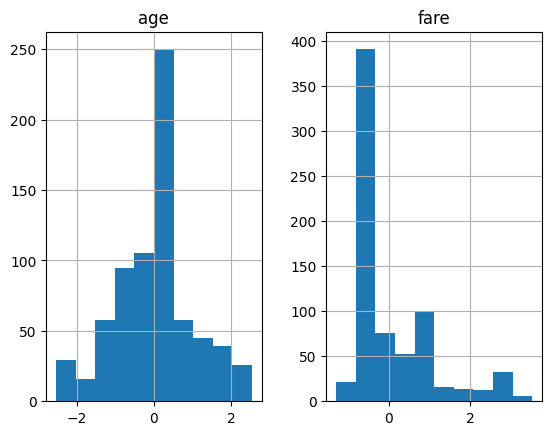

In [ ]:
out_x2[전처리기.n_l].hist()

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'fare'}>]], dtype=object)

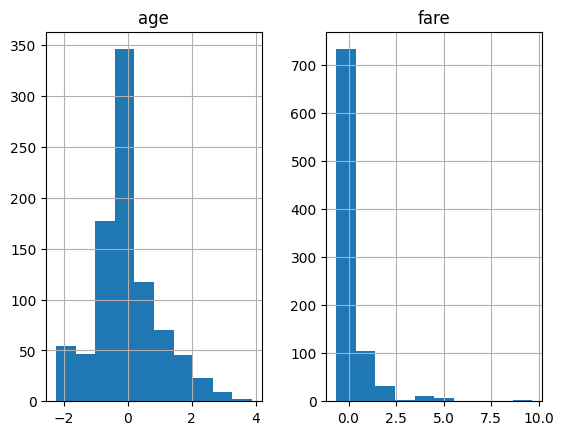

In [ ]:
out_x1[전처리기.n_l].hist()

In [ ]:
m1=LogisticRegression()
m1.fit(tr_x1,tr_y1)
m2=LogisticRegression()
m2.fit(tr_x2,tr_y2)

LogisticRegression()

In [ ]:
m1.score(tr_x1,tr_y1),m1.score(tt_x1,tt_y1)

(0.8063063063063063, 0.8565022421524664)

In [ ]:
m2.score(tr_x2,tr_y2),m2.score(tt_x2,tt_y2)

(0.8166666666666667, 0.7513812154696132)

In [ ]:
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

In [ ]:
m1=LogisticRegression()
cross_val_score(m1,tr_x1,tr_y1).mean()

0.7972730333295927

In [ ]:
m2=LogisticRegression()
cross_val_score(m2,tr_x2,tr_y2).mean()

0.787037037037037

In [ ]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [ ]:
df=sns.load_dataset('iris')
df.info()

In [ ]:
y=df.species
y

In [ ]:
X=df.drop(['species'],axis=1)
X

In [ ]:
s=StandardScaler()
s_X=s.fit_transform(X)
s_y=y.values

In [ ]:
s_X.shape,s_y.shape

((150, 4), (150,))

In [ ]:
m=LogisticRegression()
m.fit(s_X,s_y)

LogisticRegression()

In [ ]:
m.coef_,m.intercept_

(array([[-1.07404149,  1.16006342, -1.93062866, -1.81168873],
        [ 0.58780051, -0.36182377, -0.36346274, -0.82619289],
        [ 0.48624098, -0.79823965,  2.2940914 ,  2.63788161]]),
 array([-0.20531681,  2.07486525, -1.86954844]))

In [ ]:
m.decision_function(s_X)

In [ ]:
m.classes_

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [ ]:
m.predict(s_X[:1])

array(['setosa'], dtype=object)

Q1 data4을 분석하여 결과를 도출하시오

In [ ]:
df=pd.read_csv('data4.csv')
np.unique(df['class'])

array([0., 1.])

In [ ]:
X=df.drop(['class'],axis=1)
y=df['class'].values

In [ ]:
s_x=StandardScaler().fit_transform(X)
tr_x1,tt_x1,tr_y1,tt_y1=train_test_split(X,y,random_state=1)
tr_x1.shape,tt_x1.shape,tr_y1.shape,tt_y1.shape

((4872, 3), (1625, 3), (4872,), (1625,))

In [ ]:
tr_x2,tt_x2,tr_y2,tt_y2=train_test_split(X,y,random_state=1)
trs=StandardScaler()
trs.fit(tr_x2)
s_tr_x2=trs.transform(tr_x2)
s_tt_x2=trs.transform(tt_x2)
s_tr_x2.shape,s_tt_x2.shape,tr_y2.shape,tt_y2.shape

((4872, 3), (1625, 3), (4872,), (1625,))

In [ ]:
m1=LogisticRegression()
cross_val_score(m1,tr_x1,tr_y1).mean()

0.7773004791238878

In [ ]:
m1.fit(tr_x1,tr_y1)
m1.score(tr_x1,tr_y1),m1.score(tt_x1,tt_y1)

(0.7777093596059114, 0.7870769230769231)

In [ ]:
m2=LogisticRegression()
cross_val_score(m2,s_tr_x2,tr_y2).mean()

0.7791476859895751

In [ ]:
m2.fit(s_tr_x2,tr_y2)
m2.score(s_tr_x2,tr_y2),m2.score(s_tt_x2,tt_y2)

(0.7807881773399015, 0.7870769230769231)

In [ ]:
from sklearn.model_selection import cross_validate,BaseCrossValidator,KFold
cs_d=cross_validate(m1,tr_x1,tr_y1)
cs_d

{'fit_time': array([0.0286715 , 0.01825571, 0.02122879, 0.02147198, 0.02071834]),
 'score_time': array([0.00308013, 0.0057745 , 0.00290298, 0.00297022, 0.00293803]),
 'test_score': array([0.77333333, 0.77333333, 0.775154  , 0.78131417, 0.78336756])}

In [ ]:
cs_d['test_score'].mean()

0.7773004791238878

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.tree import DecisionTreeClassifier
m1=KNeighborsClassifier(n_neighbors=2)
m2=LogisticRegression(C=3,random_state=1)
m3=SGDClassifier(max_iter=10000, tol=0,random_state=1)
m4=DecisionTreeClassifier(max_depth=2,random_state=1)
s_tr_x2.shape,s_tt_x2.shape,tr_y2.shape,tt_y2.shape

((4872, 3), (1625, 3), (4872,), (1625,))

In [ ]:
for m in [m1,m2,m3,m4]:
  print(m,cross_val_score(m,s_tr_x2,tr_y2).mean())

KNeighborsClassifier(n_neighbors=2) 0.8175277207392198
LogisticRegression(C=3, random_state=1) 0.7797630706049595
SGDClassifier(max_iter=10000, random_state=1, tol=0) 0.7818173011109357
DecisionTreeClassifier(max_depth=2, random_state=1) 0.8156800926657191


In [ ]:
from sklearn.model_selection import GridSearchCV
m1=KNeighborsClassifier()
m2=LogisticRegression(random_state=10)
p1={'n_neighbors':[1,2,3,4,5,6,7,8,9],
   'leaf_size':[1,5,10,20,30]}
p2={'tol':[0,0.000001,0.0001,0.01,0.1],
    'C':[1,2,3,4,5,6,7,8,9,10],
    'max_iter':[10,100,1000,10000]
    }
gs=GridSearchCV(m2,p2)#구조설계
gs.fit(s_tr_x2,tr_y2)#학습(찾기)

In [ ]:
gs

In [ ]:
#최고의 모델
m=gs.best_estimator_
m.score(s_tr_x2,tr_y2),m.score(s_tt_x2,tt_y2)

(0.7803776683087028, 0.7864615384615384)

In [ ]:
gs.best_index_

80

In [ ]:
gs.best_params_

{'C': 5, 'max_iter': 10, 'tol': 0}

In [ ]:
gs.best_score_

0.852217975043437

In [ ]:
from sklearn.datasets import load_iris
d=load_iris()
df=pd.DataFrame(d['data'],columns=d['feature_names'])
df['y']=d['target']
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),y
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [ ]:
print(d['DESCR'])

In [ ]:
sns.load_dataset('mpg')

Q2 'mpg','iris' 데이터를 이용하여 입력시 연비를 계산해주는 예측기/꽃 종류를 분류하는 분류기를 설계하시오.

mpg 연비 예측기

In [3]:
import seaborn as sns

In [4]:
df_mpg=sns.load_dataset('mpg')
df_mpg

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


In [ ]:
X=df_mpg.drop(['mpg'],axis=1)
y=df_mpg['mpg']

In [ ]:
X=X.iloc[:,:7]
c_l=[]
n_l=[]
for i in X.columns:
  if X[i].nunique()<20:
    c_l.append(i)
  #else:
    #n_l.append(i)

X=X.astype(dict.fromkeys(c_l,'category'))
#X=X.astype(dict.fromkeys(n_l,'category'))
X=X.astype(dict.fromkeys([i for i in X.columns if i not in c_l],'float64'))
X.dropna(inplace=True)
d = pd.merge(X,y,right_index=True,left_index=True)
X=d.drop(['mpg'],axis=1)
y=d['mpg'].values
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   cylinders     392 non-null    category
 1   displacement  392 non-null    float64 
 2   horsepower    392 non-null    float64 
 3   weight        392 non-null    float64 
 4   acceleration  392 non-null    float64 
 5   model_year    392 non-null    category
 6   origin        392 non-null    category
dtypes: category(3), float64(4)
memory usage: 17.4 KB


In [ ]:
from sklearn.compose import make_column_selector
from sklearn.compose import make_column_transformer
pr_m=make_column_transformer((StandardScaler(),make_column_selector(dtype_include='float64')),(OneHotEncoder(),make_column_selector(dtype_include='category')))
pr_m.fit(X)

ColumnTransformer(transformers=[('standardscaler', StandardScaler(),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x78fcc1c49bd0>),
                                ('onehotencoder', OneHotEncoder(),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x78fcc1c48b50>)])

In [ ]:
s_X=pr_m.transform(X)

In [ ]:
pr_m.get_feature_names_out()

iris 꽃종류 분류기

In [ ]:
df_iris=sns.load_dataset('iris')
df_iris

In [ ]:
df_iris.drop(['species'],axis=1).columns.to_list()

['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

In [ ]:
X=df_iris.drop(['species'],axis=1).values
y=df_iris['species'].values
정답=np.unique(y)

In [ ]:
ss=StandardScaler()
s_X=ss.fit_transform(X)
s_x

In [ ]:
def 추가입력_전처리기(df,s,y_name):
  구성정보=df.drop([y_name],axis=1).columns.to_list()
  print(f'{구성정보}를 입력하시오.')
  in_l=[]
  for i in 구성정보:
    in_l.append(eval(input(f'{i}:')))
  X=[in_l]
  out_x=s.transform(X)
  return out_x